<a href="https://colab.research.google.com/github/Rsoni94/Coronavirus_Sentiment_Anlysis_Project/blob/main/Corona_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")


In [5]:
df=pd.read_csv("/content/drive/MyDrive/Corona Virus Stentiment Analysis Project/Coronavirus Tweets.csv",encoding="latin1")

In [7]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
df.shape

(41157, 6)

In [9]:
duplicates = df[df.duplicated()]
len(duplicates)

0

In [10]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<AxesSubplot:xlabel='Sentiment'>

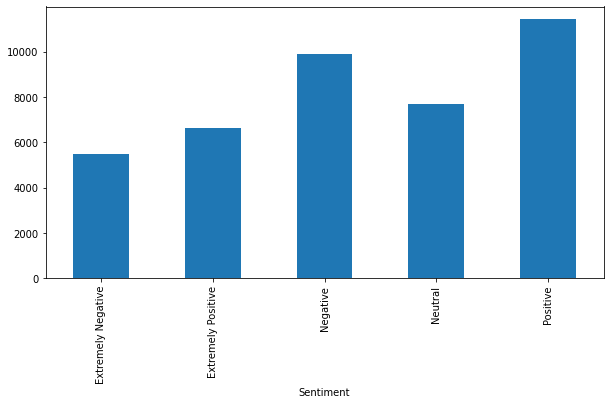

In [11]:
counts = df.groupby("Sentiment")["Sentiment"].agg("count")

fig, ax = plt.subplots(figsize=(10,5))
counts.plot.bar()

In [12]:
df.drop(df[df.Sentiment == "Neutral"].index, inplace = True)

df.Sentiment.unique()

array(['Positive', 'Extremely Negative', 'Negative', 'Extremely Positive'],
      dtype=object)

In [13]:
# Aggregate extremely positive/negative values
df = df.replace("Extremely Positive", "Positive")
df = df.replace("Extremely Negative", "Negative")

df.Sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

<AxesSubplot:xlabel='Sentiment'>

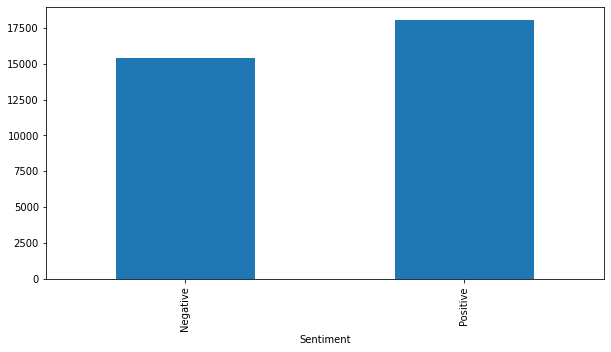

In [14]:
counts = df.groupby("Sentiment")["Sentiment"].agg("count")
fig, ax = plt.subplots(figsize=(10,5))

counts.plot.bar()

In [15]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive


In [16]:
# count number of words per headline. strip whitespaces at the beginning/end of the sentence 
# and tokenize by whitespace
df_select = df[["OriginalTweet", "Sentiment"]]
df_select["word_count"] = df_select["OriginalTweet"].apply(lambda x: len(x.strip().split(" ")))
df_select.head()


,OriginalTweet,Sentiment,word_count
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,40
4,"Me, ready to go at supermarket during the #COV...",Negative,38
5,As news of the regionÂs first confirmed COVID...,Positive,36


In [17]:
df_select["word_count"].describe()

count    33444.000000
mean        31.979398
std         11.044458
min          1.000000
25%         24.000000
50%         33.000000
75%         41.000000
max        127.000000
Name: word_count, dtype: float64

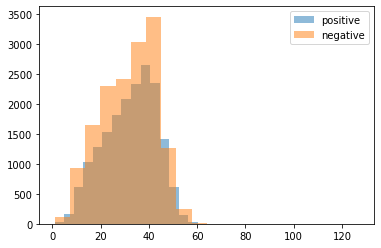

In [18]:
pos = df_select[df_select.Sentiment == "Positive"].word_count
neg =  df_select[df_select.Sentiment == "Negative"].word_count

plt.hist(pos, bins = 20, alpha = 0.5, label='positive')
plt.hist(neg, bins = 20, alpha = 0.5, label='negative')
plt.legend(loc='upper right')
plt.show()

In [19]:
df_select

,OriginalTweet,Sentiment,word_count
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,40
4,"Me, ready to go at supermarket during the #COV...",Negative,38
5,As news of the regionÂs first confirmed COVID...,Positive,36
...,...,...,...
41150,I never that weÂd be in a situation &amp; wor...,Positive,34
41151,@MrSilverScott you are definitely my man. I fe...,Positive,48
41153,Response to complaint not provided citing COVI...,Negative,23
41154,You know itÂs getting tough when @KameronWild...,Positive,19


In [20]:
# save dataset
df_select.to_csv("./df_data.csv",index = False, encoding = "utf-8")

In [21]:
df = pd.read_csv("./df_data.csv")

In [23]:
df

,OriginalTweet,Sentiment,word_count
0,advice Talk to your neighbours family to excha...,Positive,38
1,Coronavirus Australia: Woolworths to give elde...,Positive,14
2,My food stock is not the only one which is emp...,Positive,40
3,"Me, ready to go at supermarket during the #COV...",Negative,38
4,As news of the regionÂs first confirmed COVID...,Positive,36
...,...,...,...
33439,I never that weÂd be in a situation &amp; wor...,Positive,34
33440,@MrSilverScott you are definitely my man. I fe...,Positive,48
33441,Response to complaint not provided citing COVI...,Negative,23
33442,You know itÂs getting tough when @KameronWild...,Positive,19


In [24]:
text = df.OriginalTweet.iloc[4]
text

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [25]:
def preprocessor(text):
    # convert to lowercase, susbstitute non alphanumerical characters with whitespaces
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [26]:
# preprocess entire corpus
df['tweet_clean'] = df['OriginalTweet'].apply(preprocessor)
df.head()

,OriginalTweet,Sentiment,word_count,tweet_clean
0,advice Talk to your neighbours family to excha...,Positive,38,advice talk to your neighbours family to excha...
1,Coronavirus Australia: Woolworths to give elde...,Positive,14,coronavirus australia woolworths to give elder...
2,My food stock is not the only one which is emp...,Positive,40,my food stock is not the only one which is emp...
3,"Me, ready to go at supermarket during the #COV...",Negative,38,me ready to go at supermarket during the covid...
4,As news of the regionÂs first confirmed COVID...,Positive,36,as news of the regionâ s first confirmed covid...
